In [11]:
import pandas as pd
import numpy as np

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import os

### load data

In [13]:
main_folder = r"C:\Users\Alexandre Boulenger\santransakt_main"
data_folder = os.path.join(main_folder, 'data')

In [14]:
train = pd.read_csv(os.path.join(data_folder,"train.csv"))
test = pd.read_csv(os.path.join(data_folder,"test.csv"))

### prep data

In [15]:
test['target'] = '_'#np.?
cols = test.columns[:-1].tolist()
cols = [cols[0], 'target']+cols[1:]
test = test.loc[:,cols]

In [16]:
traintest = pd.concat([train, test])
traintest.reset_index(drop=True, inplace=True)
traintest['set'] = 'test'
traintest.loc[train.index,'set'] = 'train'
traintest.set.value_counts()

test     200000
train    200000
Name: set, dtype: int64

In [21]:
X_tr = train.drop(columns=['target', 'ID_code']).copy()
X_te = test.drop(columns=['target', 'ID_code']).copy()
X = traintest.drop(columns=['target', 'ID_code']).copy()

In [26]:
y_tr = train.target.copy()
y = traintest.target.copy()

### conduct EDA

#### explore target

In [18]:
y_tr = train.target.copy()

classification problem:

In [19]:
y_tr.unique()

array([0, 1], dtype=int64)

there is class imbalance:

In [20]:
y_tr.value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

#### explore predictors - variable set reduced to those with most importance

type always float

In [30]:
X_tr.dtypes.unique(), X_te.dtypes.unique()

(array([dtype('float64')], dtype=object),
 array([dtype('float64')], dtype=object))

no missing values

In [29]:
X_tr.isnull().any().any(), X_te.isnull().any().any()

(False, False)

run random forest classifier to get feature importance

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [35]:
clf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

select only important features

In [83]:
feat_imp = clf.feature_importances_
feat_imp = pd.DataFrame(feat_imp, columns=['imp'])
feat_imp['name'] = X_tr.columns.tolist()
feat_imp = feat_imp.sort_values('imp', ascending=False)

In [84]:
feat_sel_2 = feat_imp.query('imp>0')

plot importance of features to find importance threshold 

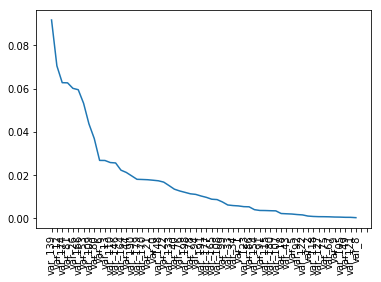

In [85]:
plt.xticks(np.arange(X_tr.shape[1]), feat_sel.feat_name.tolist(), rotation=90)
plt.plot(feat_sel.feat_imp.tolist())

select most important features

In [88]:
feat_sel_1 = feat_imp.loc[feat_imp.index[:9]]
feat_sel_1_names = feat_sel_1.name.tolist()

descriptive statistics: no variables are centered or normalized

In [92]:
X_tr.loc[:,feat_sel_1_names].describe()

,var_139,var_12,var_174,var_81,var_26,var_166,var_53,var_109,var_80
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,7.760193,14.023978,20.210677,14.719024,-4.055133,2.963335,6.008569,18.458001,5.795044
std,7.686433,0.190059,7.136427,2.299567,5.922210,0.369684,0.764753,4.355031,7.436737
min,-21.274300,13.434600,-2.995300,7.586500,-24.243100,1.851200,3.344900,5.769700,-18.042200
25%,2.387575,13.894000,15.064600,13.214775,-8.321725,2.699000,5.435600,15.107175,0.694475
50%,8.066250,14.025500,20.206100,14.844500,-4.196900,2.960200,6.027800,18.281350,6.061750
75%,13.232525,14.164200,25.641225,16.340800,-0.090200,3.241500,6.542900,21.852900,11.449125
max,36.097100,14.654500,43.546800,23.132400,15.675100,4.220400,8.231500,32.059100,30.476900


check distribution vs. test set using statistics

In [95]:
X_te.loc[:,feat_sel_1_names].describe()-X_tr.loc[:,feat_sel_1_names].describe()

,var_139,var_12,var_174,var_81,var_26,var_166,var_53,var_109,var_80
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.005694,-0.001316,0.053458,0.010907,0.071412,-0.000514,0.006787,-0.002544,0.020038
std,-0.002482,0.000011,0.005389,-0.004515,0.023644,0.000984,-0.000371,0.013616,-0.009217
min,0.000000,-0.010100,0.509900,0.618200,-0.293000,-0.038100,0.066500,-0.691500,1.337700
25%,0.051425,-0.003000,0.061900,0.007325,0.056225,-0.002500,0.008300,-0.022375,0.026800
50%,-0.030350,-0.000900,0.081100,0.020700,0.071100,0.000900,0.008700,-0.000750,-0.014900
75%,0.014000,-0.001300,0.078775,-0.006500,0.089500,0.000100,0.004025,0.008800,-0.016250
max,1.633300,0.027500,-0.788600,0.304900,-2.218700,-0.004200,-0.147600,0.114300,-2.296200


check for recurring values: ['var_12', 'var_53', 'var_166'] are interesting

In [109]:
for f in feat_sel_1_names:
    print(X_tr.loc[:,f].value_counts().head(10))

10.7498    8
2.9769     8
9.3837     8
10.4777    8
10.8027    8
6.8278     8
10.0698    8
9.0266     7
10.1157    7
7.3828     7
Name: var_139, dtype: int64
13.5545    203
13.5547    159
13.5546    150
13.5542    150
13.5544    148
13.5543    147
13.5548    122
13.5549    120
13.5550    107
13.5540    102
Name: var_12, dtype: int64
20.0748    8
24.8502    8
22.4484    8
24.7084    7
21.8905    7
21.2149    7
23.1602    7
18.6328    7
14.3687    7
26.8842    7
Name: var_174, dtype: int64
15.6210    14
15.8789    13
14.1672    13
15.0039    13
13.5828    13
15.9831    13
16.2902    13
14.2303    12
15.7141    12
15.0453    12
Name: var_81, dtype: int64
 0.7814     9
-6.9358     8
-8.3158     8
-9.7403     8
-1.1735     8
-7.9918     8
-14.2851    8
-5.0997     8
-8.7815     8
-6.2418     8
Name: var_26, dtype: int64
2.7306    39
3.1320    38
2.6926    38
2.8478    38
2.8379    36
2.6523    36
2.8233    36
2.8320    34
2.8070    34
2.9625    34
Name: var_166, dtype: int64
6.4543    25
6.

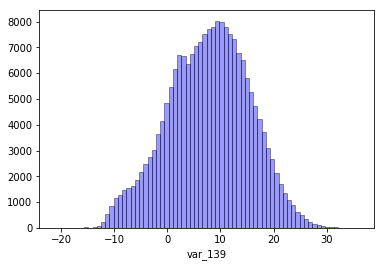

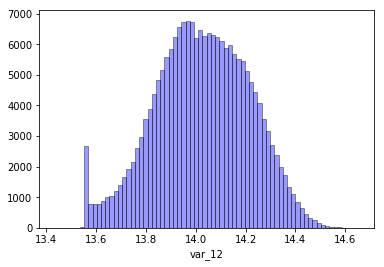

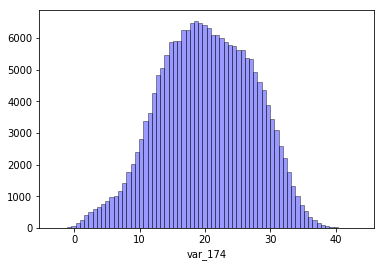

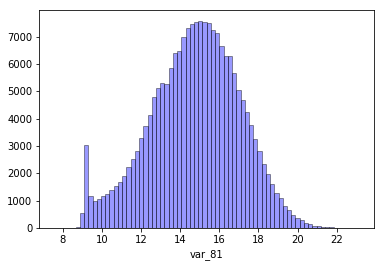

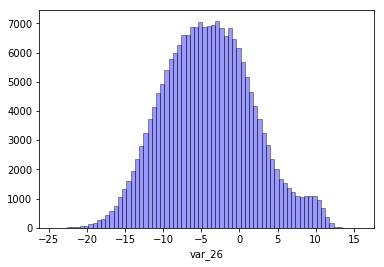

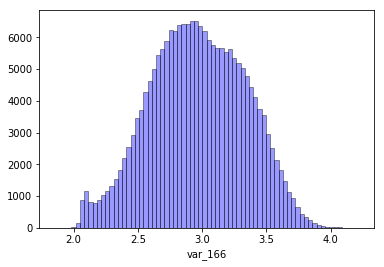

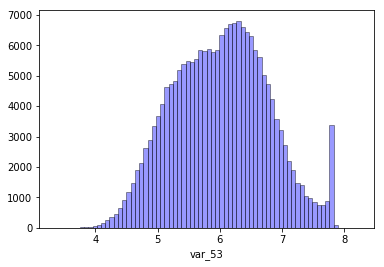

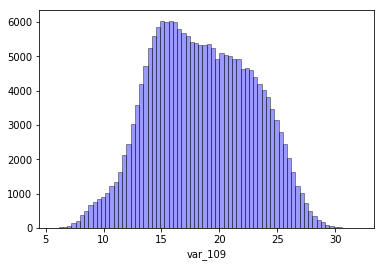

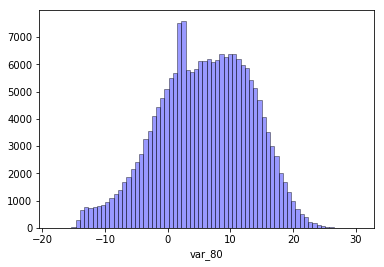

In [151]:
bins = int(360/5)
for f in feat_sel_1_names[:]:
    
    x = X_tr.loc[:,f].values
    plt.figure()
    
    # matplotlib histogram
    #plt.hist(x, color='blue', edgecolor='black', bins=bins)
    
    # seaborn histogram
    sns.distplot(x, hist=True, kde=False, bins=bins, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})
    
    # Add labels
    #plt.title('Histogram')
    plt.xlabel(f)
    
    plt.plot()

In [ ]:
# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
